Please **submit this Jupyter notebook through Canvas** no later than **Monday November 5 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

In [102]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True

Steven Raaijmakers - 10804242
Nizar El Mahjoubi - 10642021

-----
# Exercise 1
Compute a solution to the equation

$$ 600 x^4 - 550 x^3 + 200 x^2 - 20 x - 1 = 0, \quad x \in [0.1, 1.0], $$

using each of the following methods.

We use the same initial value(s) for all the methods. The newton method only needs one input value ($x_0$) in contrast to the secant and interval bisection methods (who both needs $x_0$ and $x_1$). We use $x_0 = 0.1$ and $x_1 = 0.9$ (because $sign(f(x_0) \neq sign(f(x_1))$).

In [103]:
def f(x):
    return 600*x**4 - 550*x**3 + 200*x**2 - 20*x - 1

def d(x):
    return 2400*x**3 - 1650*x**2 + 400*x - 20

x0 = 0.1
x1 = 0.9

## (a)
Using the interval bisection method.

In [104]:
def interval_bisection(initial, f, tol):
    a, b = initial
    
    As, Bs = [a], [b]
    
    while (b - a) > tol:
        m = a + (b - a) / 2
        if np.sign(f(a)) == np.sign(f(m)):
            a = m
        else:
            b = m
        As.append(a)
        Bs.append(b)
    return As, Bs

In [105]:
a, b = interval_bisection((x0, x1), f, 10e-5)

print("(" + str(a[-1]) + ", " + str(b[-1]) + ")")

(0.23232421875, 0.232421875)


## (b)
Using newton's method.

In [106]:
def newton_1d(x0, f, d, rep=20):
    Xs = [x0]
    for k in range(rep):
        Xs.append(Xs[-1] - f(Xs[-1]) / d(Xs[-1]))
        if(Xs[-1] == Xs[-2]):
            break
    return Xs

In [107]:
print(newton_1d(x0, f, d)[-1])

0.2323529647499171


In [ ]:
def f2(x):
    return x - 1 - 0.222 * ((-x)**3)

def d2(x):
    

print(newton_1d(0.5, f2, ))

## (c)
Using the secant method.

In [1]:
def f(x):
    return x**2 - 2

In [3]:
def secant(initial, f, rep=20):
    x0, x1 = initial
    Xs = [x0, x1]
    for k in range(rep-1):
        Xs.append(Xs[-1] - f(Xs[-1])*(Xs[-1] - Xs[-2]) / (f(Xs[-1]) - f(Xs[-2])))
        if(Xs[-1] == Xs[-2]):
            break
    return Xs

In [8]:
print(secant((1,2), f, rep=2)[-1])

1.3333333333333335


### (d)
Compare the speed of convergence you observe for the three methods. Plot your results and briefly explain.

Interval bisection: 	(0.23232421875, 0.232421875) after 14 iterations
Newton method: 		0.2323529647499171 after 8 iterations
Secant method: 		0.2323529647499171 after 12 iterations


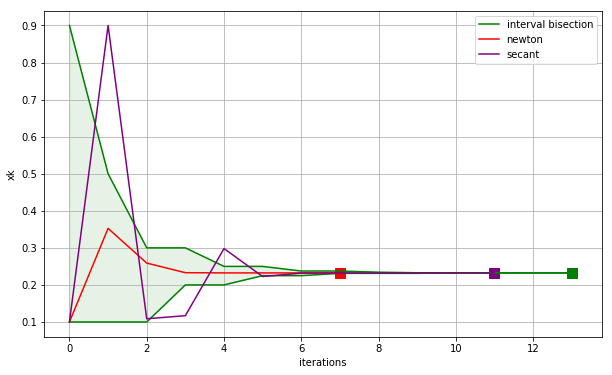

In [114]:
newton_f = newton_1d(x0, f, d)
ib_f_a, ib_f_b = interval_bisection((x0, x1), f, 10e-5)
ib_f_Xs = np.arange(0, len(ib_f_a))

# text
print("Interval bisection: \t(" + str(ib_f_a[-1]) + ", " + str(ib_f_b[-1]) +
      ") after " + str(len(ib_f_a)) + " iterations")
print("Newton method: \t\t" + str(newton_f[-1]) + " after " + str(len(newton_f)) + " iterations")
print("Secant method: \t\t" + str(secant_f[-1]) + " after " + str(len(secant_f)) + " iterations")

# plotting
plt.plot(ib_f_a, "g", label="interval bisection")
plt.plot(ib_f_b, "g", label="interval bisection")
plt.fill_between(ib_f_Xs, ib_f_a, ib_f_b, color="green", alpha=0.1)
plt.scatter(len(ib_f_a) - 1, ib_f_a[-1], s=100, color="green", marker="s")

plt.plot(newton_f, color="red", label="newton")
plt.scatter(len(newton_f) - 1, newton_f[-1], s=100, marker="s", color="red")

plt.plot(secant_f, label="secant", color="purple")
plt.scatter(len(secant_f) - 1, secant_f[-1], s=100, color="purple", marker="s")

plt.xlabel("iterations")
plt.ylabel("xk")
plt.legend()

In the plot we can see that the newton is converging after fewer iterations than the secant and the bisection method, thus making it the "quickest" in terms of iterations. 

However, we must note that the newton method might not always be the best option. For the newton method we need to know the deravative, which in our case can be easly derived, but this might not always be the case. In addition the newton method needs to evaluate both $f(x)$ and $f'(x)$ for every iteration, which might be costly. Using the secant method we don't need to know $f'(x)$ and only one function is evaluated per iteration, however in our case it converges slower than the newton method. The bisection method has a guaranteed convergence but is much slower. 

--------
# Exercise 2
Consider the following boundary value problem involving a nonlinear ordinary differential equation:

$$y''(x) + \exp(y(x)) = 0, \quad 0 < x < 1, \quad y(0) = y(1) = 0.$$

We can approximate the solution by discretizing the differential equation and solving the resulting system of nonlinear equations. Suppose we use $n+2$ discretization points for $x$ (denoted $x_k = kh$ for $k \in \{0, \ldots, n+1\}$ and $h = 1/(n+1)$, the approximate solution is denoted $y_k = y(x_k)$.

We will use a _central finite difference_ approximation for the second derivative: 

$$y''(t_k) \approx (y_{k+1} - 2 y_k + y_{k-1})/h^2.$$

From the boundary values, we conclude that $y_0 = y_{n+1} = 0$. The result is a set of $n$ nonlinear equations

$$ \frac{y_{k+1} + y_{k-1} - 2 y_k}{h^2} + \exp y_k = 0, \quad k = 1, \ldots, n.$$

## (a)
Write this set of equations as $\mathbf{f}(\mathbf x) = \mathbf{0}$, where $\mathbf f$ is a function from $\mathbf x \in \mathbb R^{n}$ to $\mathbf f(\mathbf x) \in \mathbb R^{n}$. What is $\mathbf x$, and what is $\mathbf f$?

$${\displaystyle \left( \begin{array}{c}
\frac{y_{2} + y_{0}-2y_{1}}{h^2} + \exp y_1\\
\frac{y_{3} + y_{1}-2y_{2}}{h^2} + \exp y_2 \\
\vdots \\
\frac{y_{n+1} + y_{n-1}-2y_{n}}{h^2} + \exp y_n
\end{array} \right) 
% \cdot 
% \left( \begin{array}{c}
% k_1 \\
% k_2 \\ 
% \vdots \\
% k_n
% \end{array} \right)
= 
\left( \begin{array}{c}
0 \\
0 \\
\vdots \\
0
\end{array} \right)}$$

With f:

$${\displaystyle \left( \begin{array}{c}
\frac{y_{2} + y_{0}-2y_{1}}{h^2} + \exp y_1\\
\frac{y_{3} + y_{1}-2y_{2}}{h^2} + \exp y_2 \\
\vdots \\
\frac{y_{n+1} + y_{n-1}-2y_{n}}{h^2} + \exp y_n
\end{array} \right) }$$


and x:

$${\displaystyle \left( \begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{array} \right) 
}$$

## (b)
What is the Jacobian corresponding to this set of equations?



$${\displaystyle A = \left( \begin{array}{cccccc}
\frac{-2}{h^2} + e^{y_1} &  \frac{1}{h^2}  &   &  &  & 0 \\
\frac{1}{h^2}  & \frac{-2}{h^2} + e^{y_2} & \frac{1}{h^2} &  & &  \\ 
 & \frac{1}{h^2} & \frac{-2}{h^2} + e^{y_3} &  \frac{1}{h^2} & & \\
 &  & \frac{1}{h^2} & \frac{-2}{h^2} + e^{y_4} & \ddots &  \\
 & & & \ddots & \ddots & \frac{1}{h^2} \\
0 &  &  &  & \frac{1}{h^2} & \frac{-2}{h^2} + e^{y_n}
\end{array} \right) \,}$$


## (c)
Using Newton's method, solve the system of equations. Try various initial guesses, including zero (i.e., $y_k = 0$ for all $k$). Show the solutions you find, and discuss the convergence that you observe.

Solve $J_{F}(x_{n})(x_{n+1}-x_{n})=-F(x_{n})$, because we are trying to solve a set of non-linear equations.

In [120]:
# DRY
# expensive?
def add_zeros(y):
    tmp = np.copy(y)
    tmp = np.insert(tmp, 0, 0)
    tmp = np.append(tmp, 0)
    return tmp

def jacobian(y):
    n = len(y)
    tmp = np.zeros((n, n))
    
    h = 1 / (n+1)
    t1 = 1 / (h**2)
    
    for (i, j), _ in np.ndenumerate(tmp):
        if i == j:
            tmp[i][j] = -2 / h**2 + np.exp(y[i])
        elif i - 1 == j:
            tmp[i][j] = t1
        elif i + 1 == j:
            tmp[i][j] = t1
    return tmp

def f(y):
    n = len(y)
    tmp = np.zeros(n)

    # boundaries
    y = add_zeros(y)
    
    h = 1 / (n + 1)

    for i in range(1, (n + 1)):
        tmp[i-1] = (y[i+1] + y[i-1] - 2*y[i]) / h**2 + np.exp(y[i])
    
    return tmp

# list iterations > numpy array iterations!!
def newton_stop(initial, m=10):
    Xs = [initial]
    
    k = 0   
    while k < m: 
        s = np.linalg.solve(jacobian(Xs[-1]), -1*f(Xs[-1]))
        tmp = Xs[-1] + s
        Xs.append(tmp)
        
        k += 1
        
        # default tolerance?   
        if np.all(np.isclose(Xs[-1], Xs[-2])):
            break
    
    return np.asarray(Xs), k

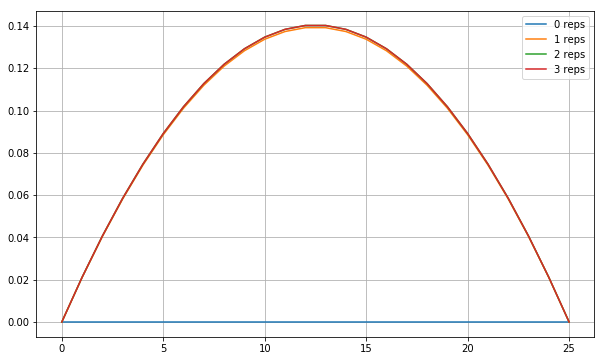

In [121]:
n = 24

yk = np.zeros(n)

ys, k = newton_stop(yk)

for i, y in enumerate(ys):
    y = add_zeros(y)
    plt.plot(y, label=str(i) + " reps")
    
plt.legend()

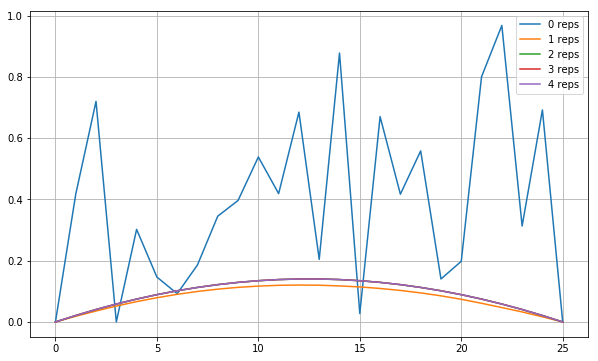

In [122]:
np.random.seed(1)
yk = np.random.rand(n)

ys, k = newton_stop(yk)

for i, y in enumerate(ys):
    y = add_zeros(y)
    plt.plot(y, label=str(i) + " reps")

plt.legend()

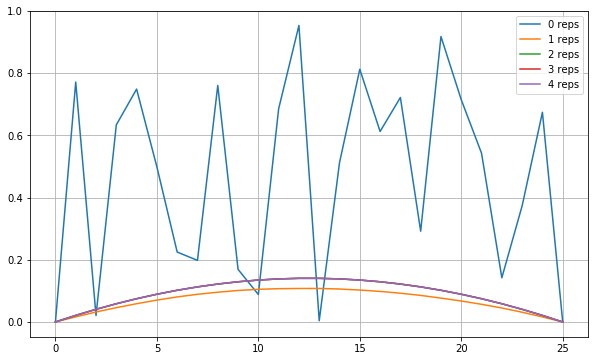

In [123]:
np.random.seed(10)
yk = np.random.rand(n)

ys, k = newton_stop(yk)

for i, y in enumerate(ys):
    y = add_zeros(y)
    plt.plot(y, label=str(i) + " reps")

plt.legend()

We can see that for $y_k = 0$ for all $k$ the newton method converges to a solution after only three repetitions. For a random input vector (with $0 < value < 1$) the newton method always converges after four repetitions. 

We also note that the for the random initial guess the newton method converges to a parabola after only one repition.